Copyright © 2020 IUBH Internationale Hochschule

### PCA 

**P**rincipal **C**omponent **A**nalysis applied to the Iris dataset.
"PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. In scikit-learn, PCA is implemented as a $transformer$ object that learns $n$ components in its fit method, and can be used on new data to project it on these components.

PCA centers but does not scale the input data for each feature before applying the SVD. The optional parameter $whiten=True$ makes it possible to project the data onto the singular space while scaling each component to unit variance. This is often useful if the models down-stream make strong assumptions on the isotropy of the signal: this is for example the case for Support Vector Machines with the RBF kernel and the K-Means clustering algorithm."[1]


mor info on sciki-learn: [scikit-learn.PCA](https://scikit-learn.org/stable/modules/decomposition.html#pca)

[[1]](https://scikit-learn.org/stable/modules/decomposition.html#pca)

**Iris Dataset**<br>
In this notebook the iris-dataset is used for demonstrating PCA.

"The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3] Fisher's paper was published in the journal, the Annals of Eugenics, creating controversy about the continued use of the Iris dataset for teaching statistical techniques today.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other."[1]

In scikit-learn the dataset is an object of the [Bunch](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch) class which is a container exposing keys of attributes.<br>
Detailled description of the iris data set on scikit-learn:  [scikit.datasets](https://scikit-learn.org/stable/datasets/index.html#iris-dataset)

[1]  Iris_flower_data_set, wikipedia [link](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [1]:
# load iris dataset and load it into a pands dataframe
#
from sklearn.datasets import load_iris
import pandas as pd
#
# combine numeric data and target names (iris-class names) in 1 data frame:
#
skBunch_iris = load_iris()
df_man = pd.DataFrame(skBunch_iris['data'], columns=skBunch_iris['feature_names'])
#
targets = skBunch_iris['target']
target_names = skBunch_iris['target_names']
#
df_man['class'] = target_names[targets]
#

# the built-in function head(n=5) show the dataFrame content of n rows
df_man.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Visualize iris dataset**

from the 4 feature variables the sepal length and width are shown in a scatter plot as follows:

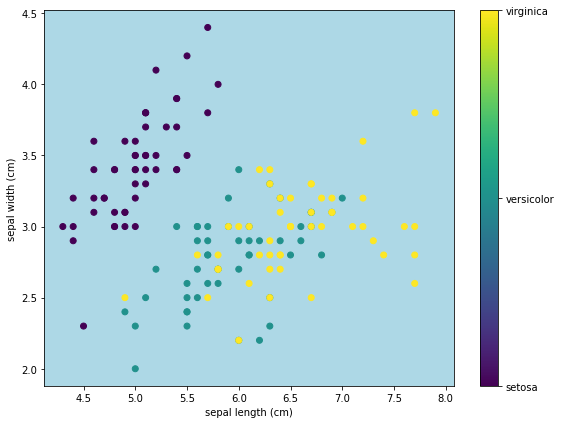

In [2]:
import matplotlib.pyplot as plt
#
#
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: skBunch_iris.target_names[int(i)])

plt.figure(figsize=(8, 6))
plt.scatter(df_man['sepal length (cm)'], df_man['sepal width (cm)'], c=targets)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.set_xticks =[]
plt.set_yticks = []
plt.gca().set_facecolor('lightblue')
plt.tight_layout()
plt.show()

**Classification with KNeighbours-Classifier**

"Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

scikit-learn implements two different nearest neighbors classifiers: KNeighborsClassifier implements learning based on the  nearest neighbors of each query point, where  is an integer value specified by the user."

source: [sciki-leanr.KNeighboursClassifier](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)

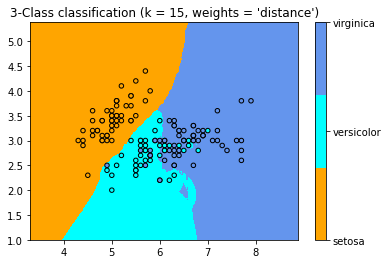

In [3]:
from numpy import unique
from numpy import arange
from numpy import where
import numpy as np
from sklearn.datasets import make_circles, make_blobs
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
#
#
# parameters
nNeighbors = 15
weight = 'distance'
#
# step-height in meshgrid
h=0.02
#
# create KNeighborsClassifier
KN = KNeighborsClassifier(n_neighbors=nNeighbors, weights=weight)
#
# Create a color map
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
#
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: skBunch_iris.target_names[int(i)])
#
# extract X and y values from the iris data set:
X = skBunch_iris.data[:, :2]
y = skBunch_iris.target
#
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

#
# fit model and predict clusters
KN.fit(X_train,y_train)
#
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#
Z = KN.predict(np.c_[xx.ravel(), yy.ravel()])
#
# Put the result into a color plot
Z = Z.reshape(xx.shape)
#
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_light, edgecolor='k', s=20)
# colorbar
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (nNeighbors, weight))
#
plt.show()

**confusion matrix**

the confusion matrix to the classified data above will be shown:


visualization according to this example: [scikit-learn.confusion_matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

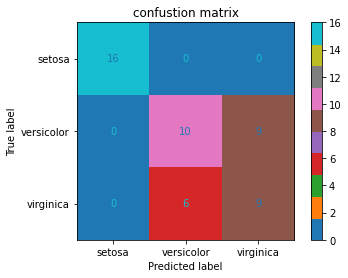

In [4]:
# confusion matrix according to the example on:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


# import some data to play with
iris = load_iris()
# X = iris.data
# y = iris.target
class_names = iris.target_names

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = KNeighborsClassifier(n_neighbors=nNeighbors, weights=weight).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(classifier, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.tab10,
                             normalize=None)
disp.ax_.set_title("confustion matrix")

plt.show()

**Performing PCA**

[pca_tutorial](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)
        

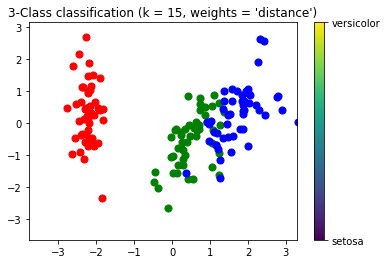

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# get features of dataset
iris_features = df_man.loc[:, skBunch_iris['feature_names']].values

# get targets of dataset
iris_targets = df_man.loc[:, 'class'].values

# standardize the features
iris_features = StandardScaler().fit_transform(iris_features)
#
#
pca = PCA(n_components=2)
#
principalComponents = pca.fit_transform(iris_features)
#
principalDF = pd.DataFrame(data=principalComponents, columns=['PCA_1', 'PCA_2'])
#
finalDF = pd.concat([principalDF, df_man['class']], axis=1)

#
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(1,1,1)
# ax.set_xlabel('PCA_1', fontsize=15)
# ax.set_ylabel('PCA_2', fontsize=15)
# ax.set_title('2 component PCA', fontsize=20)

# targets = skBunch_iris['target_names']
# colors = ['r','g','b']
# for target, color in zip(targets, colors):
#     inidicesToKeep = finalDF['class'] == target
#     ax.scatter(finalDF.loc[inidicesToKeep, 'PCA_1'],
#               finalDF.loc[inidicesToKeep, 'PCA_2'],
#               c=color,
#               s=50)
    
# ax.legend(targets)
# ax.grid()

# split data in training and test data
#
x_train, x_test, y_train, y_test = train_test_split(finalDF.iloc[:,:2].values, finalDF['class'], test_size = 0.33, random_state=0)
#
# create KNeighborsClassifier
KN = KNeighborsClassifier(n_neighbors=nNeighbors, weights=weight)
#
# fit model and predict clusters
KN.fit(x_train, y_train)
#
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#
test = KN.predict(np.c_[xx.ravel(), yy.ravel()])
#
# Put the result into a color plot
test = test.reshape(xx.shape)
#
#
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: skBunch_iris.target_names[int(i)])

# plt.pcolormesh(xx, yy, test, cmap=plt.cm.tab10)
# Plot also the training points
targets = skBunch_iris['target_names']
colors = ['r','g','b']
for target, color in zip(targets, colors):
    inidicesToKeep = finalDF['class'] == target
    plt.scatter(finalDF.loc[inidicesToKeep, 'PCA_1'],
              finalDF.loc[inidicesToKeep, 'PCA_2'],
              c=color,
              s=50)
# colorbar
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (nNeighbors, weight))
#
plt.show()

**confusion matrix**

the confusion matrix to the classified data above will be shown:


visualization according to this example: [scikit-learn.confusion_matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

Text(0.5, 1.0, 'confusion matrix')

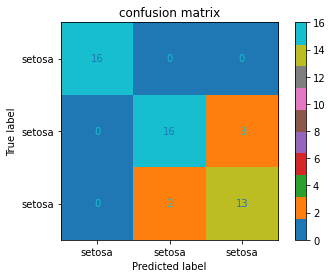

In [6]:
## confusion matrix
#
# KNeighborsClassifier
#
# KNC = KNeighborsClassifier(n_neighbors=15, weights='distance')
#
# split data in training and test data
#
# x_train, x_test, y_train, y_test = train_test_split(finalDF.iloc[:,:2].values, finalDF['class'], test_size = 0.33, random_state=42)
#
# KNC.fit(x_train, y_train)
# yPredict = KNC.predict(x_tes)
conm = plot_confusion_matrix(KN, x_test, y_test,
                            display_labels = finalDF['class'],
                            cmap=plt.cm.tab10,
                            normalize=None)
conm.ax_.set_title("confusion matrix")


Copyright © 2020 IUBH Internationale Hochschule